# Descrição do projeto:

# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

## Descrição dos planos

**Observação:** a Megaline arredonda segundos para minutos e megabytes para gigabytes. Para chamadas, cada chamada individual é arredondada para cima: mesmo que uma chamada tenha durado apenas um segundo, um minuto será contado. Para tráfego da web, sessões individuais da web não são arredondadas para cima. Ao invés disso, o total do mês é arredondado para cima. Se alguém usar 1.025 megabytes no mês, a cobrança será de 2 gigabytes.

**Aqui está uma descrição dos planos:**

**Surf**

Preço mensal: $20
500 minutos mensais, 50 mensagens de texto e 15 GB de dados
Após exceder os limites do pacote:
1 minuto: 3 centavos
1 mensagem de texto: 3 centavos
1 GB de dados: $10

**Ultimate**

Preço mensal: $70
3.000 minutos mensais, 1.000 mensagens de texto e 30 GB de dados
Após exceder os limites do pacote:
1 minuto: 1 centavo
1 mensagem de texto: 1 centavo
1 GB de dados: $7

## Dicionário de dados

- `Tabela users` (dados sobre usuários):
    - `'user_id'` — identificador exclusivo do usuário
    - `'first_name'` — nome do usuário
    - `'last_name'` — sobrenome do usuário
    - `'age'` — idade do usuário (em anos)
    - `'reg_date'` — data da inscrição (dd, mm, aa)
    - `'churn_date'` — a data que o usuário parou de usar o serviço (se o valor estiver ausente, isso significa que o plano estava em uso quando o banco de dados foi extraído)
    - `'city'` — cidade de residência do usuário
    - `'plan'` — nome do plano

- `Tabela calls` (dados sobre as chamadas):
    - `'id'` — identificador de chamada exclusivo
    - `'call_date'` — data da chamada
    - `'duration'` — duração da chamada (em minutos)
    - `'user_id'` — identificador do usuário que faz a chamada

- `Tabela messages` (dados sobre mensagens de texto):
    - `'id'` — identificador exclusivo da mensagem de texto
    - `'message_date'` — data da mensagem de texto
    - `'user_id'` — identificador do usuário que envia a mensagem de texto

- `Tabela internet` (dados sobre sessões web):
    - `'id'` — identificador exclusivo da sessão
    - `'mb_used'` — volume de dados gasto durante a sessão (em megabytes)
    - `'session_date'` — data da sessão web
    - `'user_id'` — identificador do usuário

- `Tabela plans` (dados sobre os planos):
    - `'plan_name'` — nome do plano
    - `'usd_monthly_fee'` — preço mensal em dólares americanos
    - `'minutes_included'` — pacote mensal de minutos
    - `'messages_included'` — pacote mensal de mensagens de texto
    - `'mb_per_month_included'` — volume do pacote de dados (em megabytes)
    - `'usd_per_minute'` — preço por minuto depois de exceder o limite do pacote (por exemplo, se o pacote inclui 100 minutos, o primeiro minuto excedente será cobrado)
    - `'usd_per_message'` — preço por mensagem de texto depois de exceder o limite do pacote
    - `'usd_per_gb'` — preço por gigabyte extra de dados após exceder o limite do pacote (1 GB = 1.024 megabytes)

## Plano de ação

O objetivo do projeto é analisar o comportamento dos clientes, ao usarem os serviços de telefonia, mensagem de texto e internet, oferecidos pela empresa Megaline, e observar qual dos dois planos proporciona maior receita, surf ou ultimate.
Irei carregar, observar e limpar os dados, conforme necessidade, criar variáveis que me permitam as análises dos dados e seus cálculos e, ao final, testar hipóteses.

## Inicialização

In [1]:
#carregando as bibliotecas
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns

## Carregue os dados

In [2]:
#carregando os arquivos de dados em diferentes DataFrames
df_calls = pd.read_csv('megaline_calls.csv')
df_internet = pd.read_csv('megaline_internet.csv')
df_messages = pd.read_csv('megaline_messages.csv')
df_plans = pd.read_csv('megaline_plans.csv')
df_users = pd.read_csv('megaline_users.csv')

## Prepare os dados

## Planos

In [3]:
#informações gerais/resumidas sobre o DataFrame dos planos
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
#imprimindo uma amostra de dados dos planos
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [5]:
df_plans.duplicated().sum()

0

Ao aplicar os métodos info, head e duplicated, observamos que não há valores ausentes neste caso, nem duplicatas, e os tipos de dados estão adequados.

## Usuários

In [6]:
#informações gerais/resumidas sobre o DataFrame dos usuários
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
#imprimindo uma amostra de dados dos usuários
df_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
132,1132,Edward,Roberts,39,"San Francisco-Oakland-Berkeley, CA MSA",2018-04-14,ultimate,NaN
188,1188,Ethelene,Brock,31,"Richmond, VA MSA",2018-01-10,ultimate,NaN
362,1362,Kenyetta,Mcknight,65,"Denver-Aurora-Lakewood, CO MSA",2018-01-18,surf,NaN
93,1093,Karima,Hampton,69,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-12-17,surf,NaN
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
206,1206,Angelic,Singleton,21,"Providence-Warwick, RI-MA MSA",2018-07-09,surf,NaN
464,1464,Burt,Burke,70,"Providence-Warwick, RI-MA MSA",2018-11-07,surf,NaN
21,1021,Ricarda,Booker,37,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-21,surf,NaN
395,1395,Leonard,Wooten,24,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-19,ultimate,NaN
153,1153,Kathaleen,Crawford,30,"Bridgeport-Stamford-Norwalk, CT MSA",2018-06-19,surf,NaN


In [8]:
df_users.duplicated().sum()

0

Ao aplicar os métodos info e sample, observamos que a única coluna com dados ausentes é churn_date, portanto, faz sentido mantê-los e, por isso, também manterei esses dados como tipo object. Mudarei a coluna reg_date para o tipo datetime. Não há linhas duplicadas.

### Corrija os dados

In [9]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d') 
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


## Chamadas

In [10]:
#informações gerais/resumidas sobre o DataFrame das chamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
#imprimindo uma amostra de dados das chamadas
df_calls.sample(10)

,id,user_id,call_date,duration
71269,1254_75,1254,2018-08-18,0.41
37776,1141_935,1141,2018-09-01,5.06
6891,1032_41,1032,2018-12-23,3.70
6129,1029_293,1029,2018-10-07,7.72
121520,1427_188,1427,2018-06-26,12.23
99964,1358_380,1358,2018-08-23,0.00
21944,1081_150,1081,2018-06-21,0.00
81654,1294_4,1294,2018-09-27,10.20
137326,1498_256,1498,2018-12-20,3.87
17287,1066_395,1066,2018-04-20,14.86


In [10]:
df_calls.duplicated().sum()

0

Ao aplicar os métodos info, sample e duplicated, observamos que não há valores ausentes neste caso, nem duplicatas. Mudarei 'duration' para o tipo int, uma vez que foi dito que cada chamada individual é arredondada para cima e representada em minutos. Também mudarei 'call_date' para o tipo datetime, por representar datas.

### Corrija os dados

In [11]:
df_calls['duration'] = df_calls['duration'].astype('int')

In [12]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d') 

In [13]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 3.7+ MB


## Mensagens

In [14]:
#informações gerais/resumidas sobre o DataFrame das mensagens
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
#imprimindo uma amostra dos dados das mensagens
df_messages.sample(10)

,id,user_id,message_date
32754,1203_399,1203,2018-07-06
49855,1328_813,1328,2018-07-27
53504,1340_30,1340,2018-09-27
70665,1460_147,1460,2018-08-29
73148,1470_776,1470,2018-12-20
5015,1046_77,1046,2018-08-08
13040,1086_70,1086,2018-12-28
40424,1261_52,1261,2018-08-09
68943,1447_11,1447,2018-11-24
46620,1316_555,1316,2018-11-30


In [15]:
df_messages.duplicated().sum()

0

Ao aplicar os métodos info, sample e duplicated, observamos que não há valores ausentes neste caso, nem duplicatas. Mudarei 'message_date' para o tipo datetime, por representar datas.

### Corrija os dados

In [16]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d') 
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


## Internet

In [17]:
#informações gerais/resumidas sobre o DataFrame da internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
#imprimindo uma amostra de dados para o tráfego da internet
df_internet.sample(10)

,id,user_id,session_date,mb_used
76665,1359_352,1359,2018-11-28,374.16
104667,1499_62,1499,2018-12-31,192.03
86585,1402_114,1402,2018-11-01,0.00
59768,1268_437,1268,2018-09-25,239.75
44283,1196_288,1196,2018-07-01,332.87
51920,1233_0,1233,2018-11-19,0.00
49751,1222_250,1222,2018-07-06,394.35
17440,1079_45,1079,2018-09-18,230.17
1835,1009_370,1009,2018-10-03,1003.55
2484,1011_224,1011,2018-07-12,0.00


In [18]:
df_internet.duplicated().sum()

0

Ao aplicar os métodos info, sample e duplicated, observamos que não há valores ausentes neste caso, nem duplicatas. Mudarei 'session_date' para o tipo datetime, por representar datas.

### Corrija os dados

In [19]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d') 
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


## Estude as condições dos planos

In [20]:
#imprimindo as condições do plano
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [22]:
#calculando o número de chamadas feitas por cada usuário por mês
df_calls['month'] = df_calls['call_date'].dt.month
calls_per_user_month = df_calls.groupby(['user_id', 'month']).size().reset_index(name='calls_count')

Criei a coluna 'month' para extrair as informações por mês e, então, fiz o agrupamento para as informações de chamadas por usuário. 'calls_count' registra a contagem de chamadas feitas por usuário, por mês.

In [23]:
calls_per_user_month

,user_id,month,calls_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [24]:
#calculando a quantidade de minutos gastos por cada usuário por mês
minutes_per_user_month = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='minutes_sum')

Fiz o agrupamento para as informações de chamadas por usuário e a soma por 'duration', que contém a duração das chamadas em minutos. 'minutes_sum' registra a quantidade total de minutos gastos por usuário por mês.

In [25]:
minutes_per_user_month

,user_id,month,minutes_sum
0,1000,12,108
1,1001,8,160
2,1001,9,278
3,1001,10,348
4,1001,11,379
...,...,...,...
2253,1498,12,308
2254,1499,9,312
2255,1499,10,344
2256,1499,11,269


In [26]:
#calculando o número de mensagens enviadas por cada usuário por mês
df_messages['month'] = df_messages['message_date'].dt.month
messages_per_user_month = df_messages.groupby(['user_id', 'month']).size().reset_index(name='messages_count')

Criei a coluna 'month' para extrair as informações por mês e, então, fiz o agrupamento para as informações de mensagens por usuário. 'messages_count' registra a contagem de mensagens enviadas por usuário, por mês.

In [27]:
messages_per_user_month

,user_id,month,messages_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [28]:
#calculando o volume de tráfego de internet usado por cada usuário por mês
df_internet['month'] = df_internet['session_date'].dt.month
mb_per_user_month = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='mb_sum')

Criei a coluna 'month' para extrair as informações por mês e, então, fiz o agrupamento para as informações de tráfego de internet por usuário e a soma por 'mb_used', que contém o volume de dados gastos durante cada sessão, em megabytes. 'mb_sum' registra os volumes totais de tráfego de internet usados por usuário, por mês.

In [29]:
mb_per_user_month

,user_id,month,mb_sum
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [30]:
#juntando os dados de chamadas, minutos, mensagens e internet com base em user_id e month
df_merge = pd.merge(calls_per_user_month, minutes_per_user_month, on=['user_id', 'month'], how='outer')
df_merge = pd.merge(df_merge, messages_per_user_month, on=['user_id', 'month'], how='outer')
df_merge = pd.merge(df_merge, mb_per_user_month, on=['user_id', 'month'], how='outer')

In [32]:
#adicionando as informações sobre o plano
df_merge_final = pd.merge(df_merge, df_users[['user_id', 'plan']], on='user_id', how='left')

No dataframe agregado, podemos ter acesso completo ao consumo dos usuários em cada mês.

In [33]:
#calculando a receita mensal para cada usuário
df_plans.rename(columns={'plan_name': 'plan'}, inplace=True)
df_merged = pd.merge(df_merge_final, df_plans, on='plan', how='left')

def calcular_receita(row):
    receita = 0
    if row['minutes_sum'] > row['minutes_included']:
        receita += (row['minutes_sum'] - row['minutes_included']) * row['usd_per_minute']
    if row['messages_count'] > row['messages_included']:
        receita += (row['messages_count'] - row['messages_included']) * row['usd_per_message']
    if row['mb_sum'] > row['mb_per_month_included']:
        gb_convert = np.ceil((row['mb_sum'] - row['mb_per_month_included']) / 1024)
        receita += gb_convert * row['usd_per_gb']
    
    receita += row['usd_monthly_pay']
    
    return receita
    
df_merged['receita_per_user_month'] = df_merged.apply(calcular_receita, axis=1)

Renomeei a coluna 'plan_name' para fazer o merge com df_plans, pela coluna 'plan', que contém os planos. Fiz uma função para calcular a receita mensal para cada usuário, considerando os minutos das chamadas, as mensagens e uso de internet. Converti as informações em megabyte para gigabyte, arredondando para cima, para fazer o cálculo final do uso excedente em gigabyte. Apliquei a função ao dataframe df_merged, que contém todas as informações necessárias.

## Estude o comportamento do usuário

### Chamadas

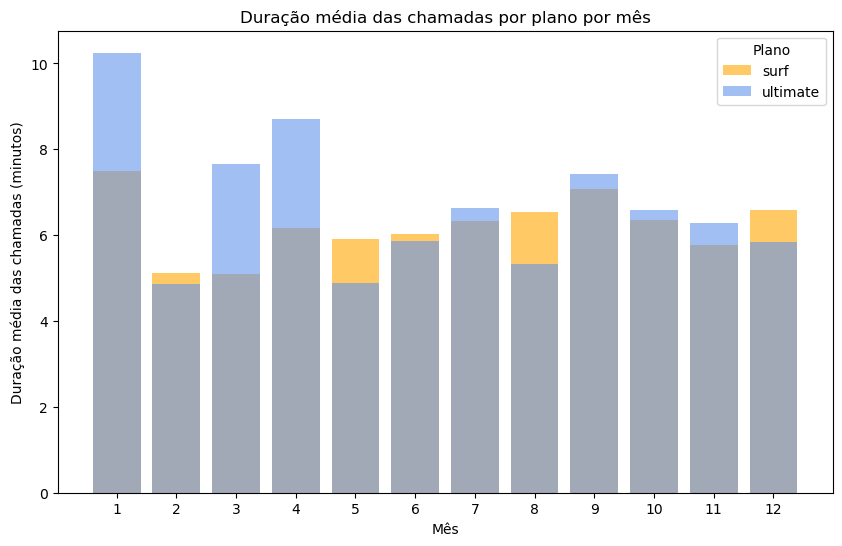

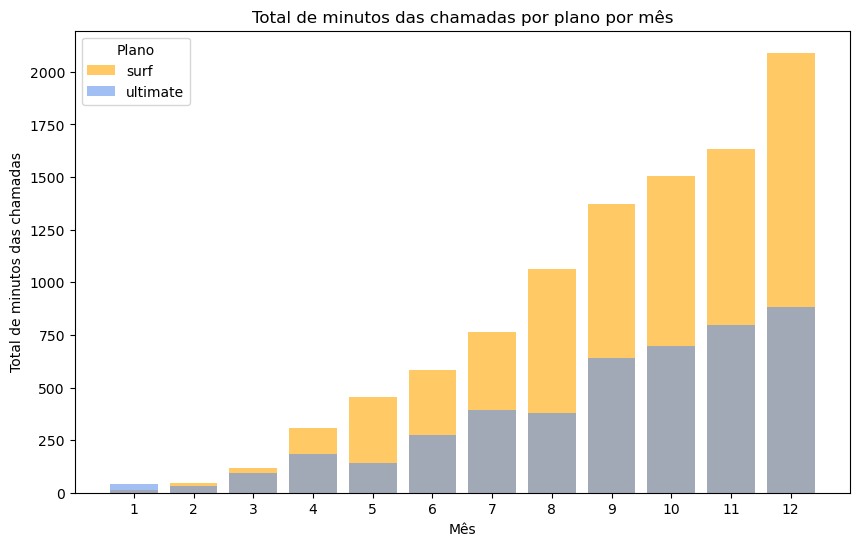

In [42]:
#comparando a duração média das chamadas de cada plano para cada mês distinto
df_merged['duration'] = df_calls['duration']
call_duration_mean = df_merged.groupby(['plan', 'month'])['duration'].mean().reset_index()
call_duration_sum = df_merged.groupby(['plan', 'month'])['duration'].sum().reset_index()

colors = {'surf': 'orange', 'ultimate': 'cornflowerblue'}

#primeiro gráfico: Duração média das chamadas por mês para cada plano
plt.figure(figsize=(10, 6))
for plan in call_duration_mean['plan'].unique():
    plt.bar(
        call_duration_mean[call_duration_mean['plan'] == plan]['month'],
        call_duration_mean[call_duration_mean['plan'] == plan]['duration'],
        label=plan,
        color=colors[plan],
        alpha=0.6
    )
plt.xlabel('Mês')
plt.ylabel('Duração média das chamadas (minutos)')
plt.title('Duração média das chamadas por plano por mês')
plt.xticks(call_duration_mean['month'].unique())
plt.legend(title='Plano')
plt.show()

#segundo gráfico: Total de minutos das chamadas por mês para cada plano
plt.figure(figsize=(10, 6))
for plan in call_duration_sum['plan'].unique():
    plt.bar(
        call_duration_sum[call_duration_sum['plan'] == plan]['month'],
        call_duration_sum[call_duration_sum['plan'] == plan]['duration'],
        label=plan,
        color=colors[plan],
        alpha=0.6
    )
plt.xlabel('Mês')
plt.ylabel('Total de minutos das chamadas')
plt.title('Total de minutos das chamadas por plano por mês')
plt.xticks(call_duration_sum['month'].unique())
plt.legend(title='Plano')
plt.show()

Adicionei a coluna 'duration' à df_merged para fazer o agrupamento e calcular a média e o total de duração das chamadas. Foi feito um loop para apresentar nos gráficos a duração média e total das chamadas em cada mês, por cada plano, separadamente.

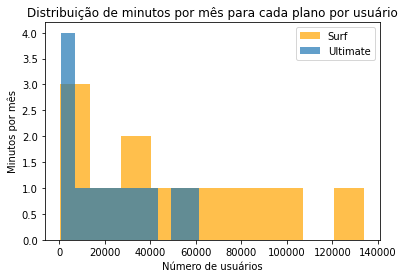

In [37]:
# Compare o número de minutos de que os usuários de cada plano necessitam a cada mês. Construa um histograma.
minutes_per_user_month_surf = df_merged[df_merged['plan'] == 'surf'].groupby('month')['minutes_sum'].sum()
minutes_per_user_month_ultimate = df_merged[df_merged['plan'] == 'ultimate'].groupby('month')['minutes_sum'].sum()

plt.hist(minutes_per_user_month_surf, bins=10, alpha=0.7, label='Surf', color='orange')
plt.hist(minutes_per_user_month_ultimate, bins=10, alpha=0.7, label='Ultimate')
plt.xlabel('Número de usuários')
plt.ylabel('Minutos por mês')
plt.title('Distribuição de minutos por mês para cada plano por usuário')
plt.legend()
plt.show()

Alguns usuários do plano ultimate utilizam mais minutos por mês, em comparação ao plano surf. No entanto, de modo geral, os usuários de ambos os planos tendem a usar poucos minutos de chamada por mês.

In [38]:
# Calcule a média e a variação da duração mensal das chamadas
call_duration_stats = df_merged.groupby(['plan', 'month'])['duration'].agg(['mean', 'var']).reset_index()

In [39]:
call_duration_stats

,plan,month,mean,var
0,surf,1,4.000000,32.000000
1,surf,2,8.777778,47.194444
2,surf,3,6.913043,32.264822
3,surf,4,5.520000,31.356735
4,surf,5,5.935065,36.719412
5,surf,6,6.536082,35.188789
6,surf,7,5.752066,29.371350
7,surf,8,6.111111,30.434783
8,surf,9,6.711340,35.118316
9,surf,10,6.438819,33.255775


Agrupei os dados por plano e mês; agg agrega as funções mean e var, para calcular a média e variância, de acordo com 'duration'.

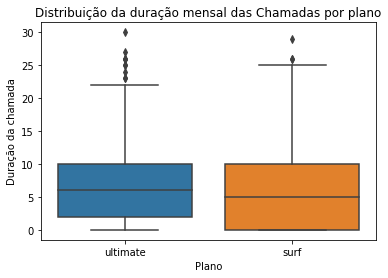

In [40]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas
sns.boxplot(x='plan', y='duration', data=df_merged)
plt.xlabel('Plano')
plt.ylabel('Duração da chamada')
plt.title('Distribuição da duração mensal das chamadas por plano')
plt.show()

O intervalo entre o primeiro e o terceiro quartil é bem semelhante em ambos boxplots, assim como a mediana. Usuários do plano ultimate, em média, tem chamadas um pouco mais longas que os usuários do plano surf. Há maior variabilidade na duração das chamadas dos usuários do plano surf. Ultimate possui mais outliers, que demonstram comportamentos diferentes da maioria dos usuários.


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

O mesmo ponto do total do mês vale aqui.
    
Para compararmos os planos é fundamental utilizarmos o boxplot para comparar a utilização em total de minutos que cada um apresenta.
</div>


<div class="alert alert-info">Não sei se entendi muito bem, devo plotar o gráfico pela soma?

total_call_duration_month = df_merged.groupby(['plan', 'month'])['duration'].sum().reset_index()

sns.boxplot(x='plan', y='duration', data=total_call_duration_month)
    
plt.xlabel('Plano')
    
plt.ylabel('Duração total da chamada')
    
plt.title('Distribuição da duração total mensal das chamadas por plano')
    
plt.show()


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Isso mesmo, essa seria a ideia!
</div>


### Mensagens

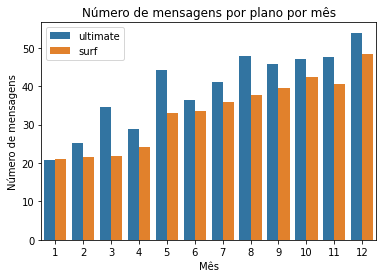

In [52]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês
messages_per_user_month = pd.merge(messages_per_user_month, df_merged[['user_id', 'month', 'plan']], on=['user_id', 'month'], how='left')
messages_per_user_month = messages_per_user_month.dropna(subset=['plan'])

sns.barplot(data=messages_per_user_month, x='month', y='messages_count', hue='plan',ci=None)
plt.xlabel('Mês')
plt.ylabel('Número de mensagens')
plt.title('Número de mensagens por plano por mês')
plt.legend()
plt.show()



<div class="alert alert-warning">
<strong>Comentário do revisor v1</strong>

Honestamente tudo parece certo para mim... Acredito que possa se tratar de algum bug pois não vejo nada de erado com seu código.

Sugio utilizar o seaborn para trabalhar com gráficos.
    
Note que abaixo consegui fazer uma visualização muito mais clara com basicamente uma linha de código. x e y sinalizam as variáveis de cada eixo e hue a variável a ser diferenciada pela cor. (ci nesse caso dispensa a aparição de intervalor de confiança).
    
    
Só tome cuidado pois se rodar os gráficos em sequência irá recriar o objeto messages_per_user_month por isso abaixo deixei o join comentado, ok?
</div>


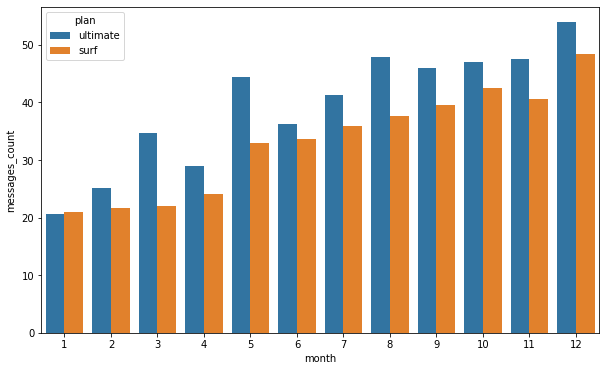

In [42]:
#messages_per_user_month = pd.merge(messages_per_user_month, df_merged[['user_id', 'month', 'plan']], on=['user_id', 'month'], how='left')
#messages_per_user_month = messages_per_user_month.dropna(subset=['plan'])


import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=messages_per_user_month, x='month', y='messages_count', hue='plan',ci=None)


plt.show()

<div class="alert alert-info">Por quê há tanta variação de cor? Creio que algo esteja errado, mas não estou entendendo o que (e nem o motivo desses valores ausentes nessa etapa).


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Quais variações de cor? Temos uma cor para cada plano... Tudo certo por aqui.
    
Não entendi sua dúvida, pode explicar melhor por favor?
</div>


<div class="alert alert-info">Na verdade essa era uma dúvida antiga, antes de eu fazer a mudança que você sugeriu. Você já havia respondido ela, no comentário amarelo.

Fiz o agrupamento para acrescentar as informações dos planos e exclui as linhas com valores ausentes na coluna 'plan', para que isso não seja plotado no gráfico, uma vez que o plano de cada usuário é uma informação relevante nesse caso. Usei seaborn para apresentar no gráfico o número de mensagens enviadas a cada mês, pelos usuários de cada plano, separadamente.

Os usuários do plano ultimate tendem a enviar mais mensagens dos que os usuários do plano surf. Os clientes de ambos os planos enviam mais mensagens em dezembro.

### Internet

In [43]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano
mb_per_user_month = pd.merge(mb_per_user_month, df_merged[['user_id', 'month', 'plan']], on=['user_id', 'month'], how='left')

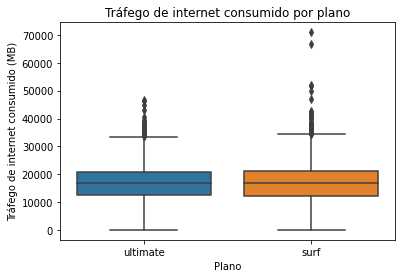

In [44]:
sns.boxplot(x='plan', y='mb_sum', data=mb_per_user_month)
plt.xlabel('Plano')
plt.ylabel('Tráfego de internet consumido (MB)')
plt.title('Tráfego de internet consumido por plano')
plt.show()

O comportamento dos usuários de ambos os planos é muito semelhante em relação ao uso de internet. No entanto, o plano surf possui mais outliers, que se diferem consideravelmente do comportamento da maioria e consomem mais dados.

## Receita

In [45]:
receita_surf = df_merged[df_merged['plan'] == 'surf'].groupby(['user_id', 'month', 'plan'])['receita_per_user_month'].sum()
receita_ultimate = df_merged[df_merged['plan'] == 'ultimate'].groupby(['user_id', 'month', 'plan'])['receita_per_user_month'].sum()

receita_surf_mean = receita_surf.mean()
receita_ultimate_mean = receita_ultimate.mean()

receita_surf_var = receita_surf.var()
receita_ultimate_var = receita_ultimate.var()

receita_surf_std = receita_surf.std()
receita_ultimate_std = receita_ultimate.std()

receita_surf_median = receita_surf.median()
receita_ultimate_median = receita_ultimate.median()

print("Média das receitas para o plano Surf:", receita_surf_mean)
print("Média das receitas para o plano Ultimate:", receita_ultimate_mean)
print("Variância das receitas para o plano Surf:", receita_surf_var)
print("Variância das receitas para o plano Ultimate:", receita_ultimate_var)
print("Desvio padrão das receitas para o plano Surf:", receita_surf_std)
print("Desvio padrão das receitas para o plano Ultimate:", receita_ultimate_std)
print("Mediana das receitas para o plano Surf:", receita_surf_median)
print("Mediana das receitas para o plano Ultimate:", receita_ultimate_median)


Média das receitas para o plano Surf: 59.994094087730446
Média das receitas para o plano Ultimate: 72.31388888888888
Variância das receitas para o plano Surf: 3040.956282591651
Variância das receitas para o plano Ultimate: 129.8484855509195
Desvio padrão das receitas para o plano Surf: 55.1448663303453
Desvio padrão das receitas para o plano Ultimate: 11.395107965742119
Mediana das receitas para o plano Surf: 40.0
Mediana das receitas para o plano Ultimate: 70.0


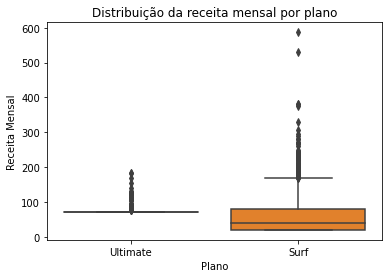

In [46]:
df_receitas = pd.concat([receita_ultimate, receita_surf], axis=1)
df_receitas.columns = ['Ultimate', 'Surf']

sns.boxplot(data=df_receitas)
plt.xlabel('Plano')
plt.ylabel('Receita Mensal')
plt.title('Distribuição da receita mensal por plano')
plt.show()

Agrupei os dados para termos as receitas mensais separadas por plano e calculei média, mediana, variância e desvio padrão para ambos. Juntei as informações das receitas de ambos os planos em um único dataframe para, então, criar o boxplot para visualização dos dados.

A distribuição do plano surf é mais ampla e dispersa, com mais valores atípicos, o que mostra uma maior variabilidade de valores de receita para esse plano (e uma média influenciada por esses valores atípicos). A distribuição para o plano ultimate é mais concentrada, próxima ao valor 100, o que sugere que a maior parte dos usuários desse plano têm uma receita mensal semelhante e menos variada, em relação ao plano surf.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Tudo certo por aqui!
</div>


## Teste hipóteses estatísticas

In [47]:
# Teste as hipóteses
#Hipótese nula (H0): As receitas médias entre os usuários dos planos Ultimate e Surf não são diferentes.
#Hipótese alternativa (H1): As receitas médias entre os usuários dos planos Ultimate e Surf são diferentes.

alpha = 0.05

results = st.ttest_ind(receita_surf, receita_ultimate, equal_var = False)

print('valor-p: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")


valor-p:  4.7715386491013573e-17
Rejeitamos a hipótese nula


Uma das hipóteses sugere que as receitas médias entre os usuários dos planos são iguais e a outra sugere que essas médias são diferentes. Ao rejeitarmos a hipótese nula, podemos concluir que as receitas médias entre os usuários dos planos ultimate e surf são sim diferentes.
Utilizei a função st.ttest_ind, uma vez que é usada para testar a hipótese de que as médias de duas populações estatísticas são iguais, com base nas amostras. Passei o parâmetro equal_var = False, baseado nos cálculos de variância das receitas do dois planos.

In [48]:
# Teste as hipóteses
#Hipótese nula (H0): A receita média dos usuários da área de NY-NJ não difere dos usuários das demais regiões.
#Hipótese alternativa (H1): A receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.

users_ny_nj = df_users[df_users['city'].str.contains('NY-NJ')]

receita_ny_nj = df_merged[df_merged['user_id'].isin(users_ny_nj['user_id'])]['receita_per_user_month']
receita_demais_regioes = df_merged[~df_merged['user_id'].isin(users_ny_nj['user_id'])]['receita_per_user_month']

alpha = 0.05

results = st.ttest_ind(receita_ny_nj, receita_demais_regioes, equal_var = False)

print('valor-p: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p:  0.02942974905729484
Rejeitamos a hipótese nula


Uma das hipóteses sugere que a receita média dos usuários da área de NY-NJ não difere dos usuários das demais regiões e a outra sugere que essas médias são diferentes. Ao rejeitarmos a hipótese nula, podemos concluir que a receita média dos usuários da área de NY-NJ e das demais regiões é sim diferente.
Utilizei a função st.ttest_ind, uma vez que é usada para testar a hipótese de que as médias de duas populações estatísticas são iguais, com base nas amostras. Passei o parâmetro equal_var = False, considerando a possibilidade de que as variâncias das receitas dos usuários da área de NY-NJ e das demais regiões sejam diferentes.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Tudo correto com os testes realizados! As conclusões fazem sentido!
</div>


## Conclusão geral


In [49]:
receita_surf.sum()

94370.70999999999

In [50]:
receita_ultimate.sum()

52066.0

Com os dados apresentados, é possível analisar o comportamento dos usuários no envio de mensagens, realização de chamadas e uso dos dados de internet. Por meio desses padrões de uso de dispositivo móvel, também podemos calcular os gastos médios de cada usuário e a receita gerada por ambos os planos fornecidos pela empresa, observando suas diferenças, também, por região.
Considerando e receita total de ambos os planos, podemos dizer que o plano surf tem gerado mais receita.